In [1]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

11490434/11490434 [==============================] - 3s 0us/step
(28, 28)
784
Epoch 1/10
235/235 [==============================] - 6s 21ms/step - loss: 0.2906 - accuracy: 0.9114 - val_loss: 0.1790 - val_accuracy: 0.9442
Epoch 2/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0978 - accuracy: 0.9697 - val_loss: 0.0896 - val_accuracy: 0.9723
Epoch 3/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0637 - accuracy: 0.9797 - val_loss: 0.0834 - val_accuracy: 0.9747
Epoch 4/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0441 - accuracy: 0.9856 - val_loss: 0.0641 - val_accuracy: 0.9812
Epoch 5/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0318 - accuracy: 0.9901 - val_loss: 0.0834 - val_accuracy: 0.9752
Epoch 6/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0229 - accuracy: 0.9926 - val_loss: 0.0634 - val_accuracy: 0.9818
Epoch 7/10
235/235 [==============================] - 5s 21ms/st

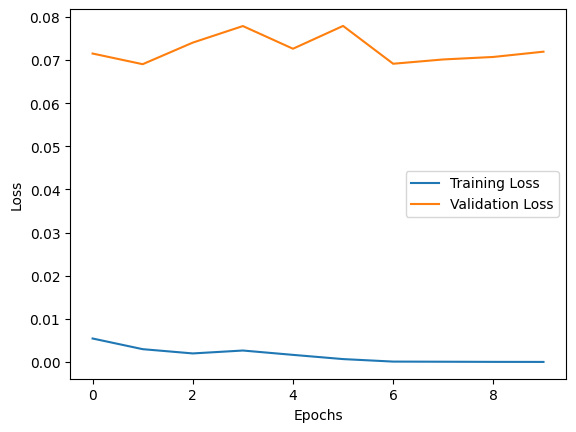

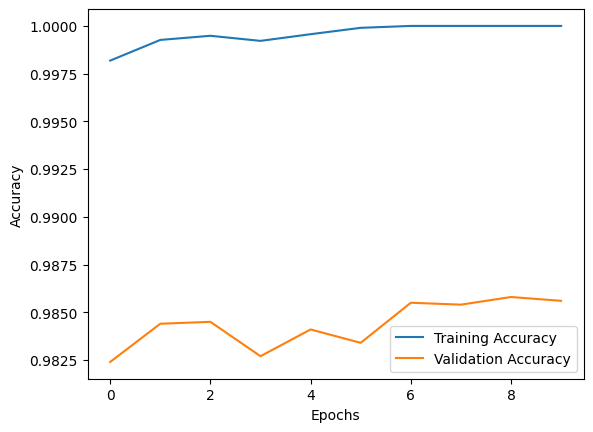

In [4]:
#Plot the loss and accuracy for both training data and validation data using the history object in the source
#code

# Plot the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


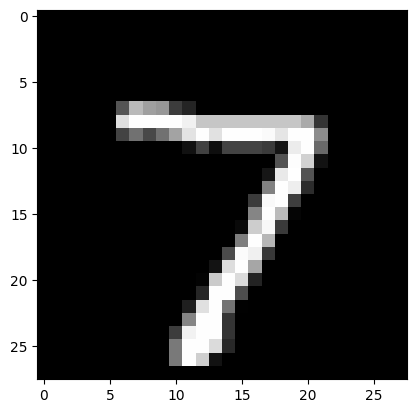

1/1 [==============================] - 0s 47ms/step
Predicted digit: 7


In [7]:
#Plot one of the images in the test data, and then do inferencing to check what is the prediction of the model
#on that single image.

import matplotlib.pyplot as plt
import numpy as np

# Plot one of the images from the test data
plt.imshow(test_images[0], cmap='gray')
plt.show()

# Perform inference
test_image = test_data[0].reshape(1, -1)  # Reshape the image data for inference
prediction = model.predict(test_image)
predicted_label = np.argmax(prediction)
print("Predicted digit:", predicted_label)


# We had used 2 hidden layers and Relu activation. Try to change the number of hidden layer and the activation to tanh or sigmoid and see what happens.

Epoch 1/10
235/235 [==============================] - 6s 20ms/step - loss: 0.4072 - accuracy: 0.8891 - val_loss: 0.2626 - val_accuracy: 0.9197
Epoch 2/10
235/235 [==============================] - 4s 19ms/step - loss: 0.1844 - accuracy: 0.9450 - val_loss: 0.1670 - val_accuracy: 0.9490
Epoch 3/10
235/235 [==============================] - 4s 19ms/step - loss: 0.1264 - accuracy: 0.9625 - val_loss: 0.1309 - val_accuracy: 0.9604
Epoch 4/10
235/235 [==============================] - 4s 19ms/step - loss: 0.0940 - accuracy: 0.9715 - val_loss: 0.1006 - val_accuracy: 0.9693
Epoch 5/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0716 - accuracy: 0.9786 - val_loss: 0.0950 - val_accuracy: 0.9690
Epoch 6/10
235/235 [==============================] - 4s 19ms/step - loss: 0.0552 - accuracy: 0.9837 - val_loss: 0.0773 - val_accuracy: 0.9757
Epoch 7/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0426 - accuracy: 0.9876 - val_loss: 0.0795 - val_accuracy: 0.9752

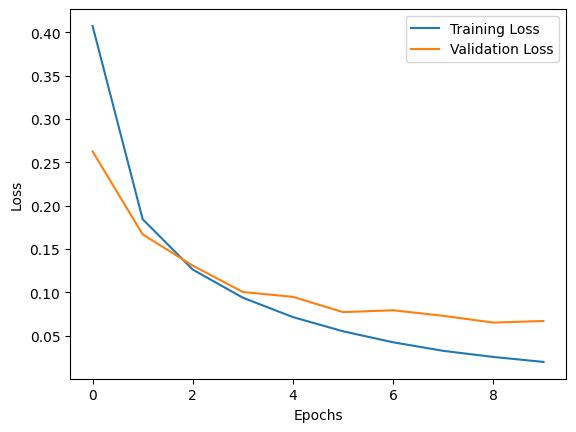

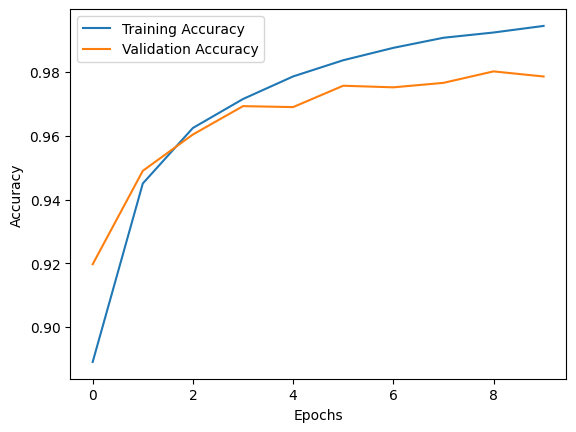

In [8]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData).astype('float32') / 255.0
test_data = test_images.reshape(test_images.shape[0], dimData).astype('float32') / 255.0

# Convert labels to one-hot encoding
train_labels_one_hot = pd.get_dummies(train_labels).values
test_labels_one_hot = pd.get_dummies(test_labels).values

# Create the model with different number of hidden layers and activation functions
model = Sequential([
    Dense(512, activation='tanh', input_shape=(dimData,)),  # Tanh activation
    Dense(256, activation='tanh'),  # Tanh activation
    Dense(128, activation='sigmoid'),  # Sigmoid activation
    Dense(10, activation='softmax')  # Output layer with softmax activation
])

# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                    validation_data=(test_data, test_labels_one_hot))

# Plot the loss and accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Run the same code without scaling the images and check the performance?

Epoch 1/10
235/235 [==============================] - 6s 23ms/step - loss: 0.2894 - accuracy: 0.9111 - val_loss: 0.1280 - val_accuracy: 0.9591
Epoch 2/10
235/235 [==============================] - 5s 23ms/step - loss: 0.1020 - accuracy: 0.9686 - val_loss: 0.0933 - val_accuracy: 0.9706
Epoch 3/10
235/235 [==============================] - 5s 22ms/step - loss: 0.0630 - accuracy: 0.9803 - val_loss: 0.0724 - val_accuracy: 0.9773
Epoch 4/10
235/235 [==============================] - 5s 20ms/step - loss: 0.0429 - accuracy: 0.9860 - val_loss: 0.0813 - val_accuracy: 0.9756
Epoch 5/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0306 - accuracy: 0.9905 - val_loss: 0.0907 - val_accuracy: 0.9726
Epoch 6/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0230 - accuracy: 0.9929 - val_loss: 0.0660 - val_accuracy: 0.9823
Epoch 7/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0161 - accuracy: 0.9954 - val_loss: 0.0641 - val_accuracy: 0.9821

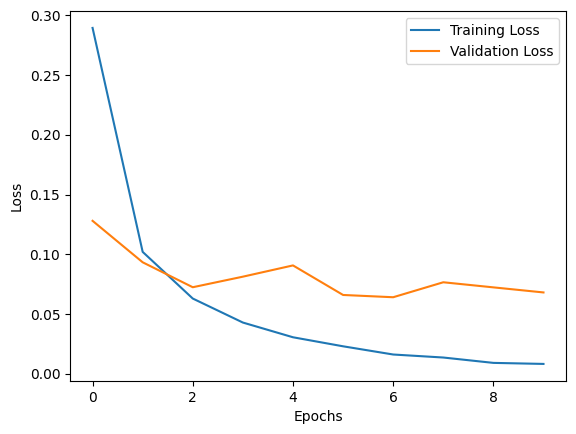

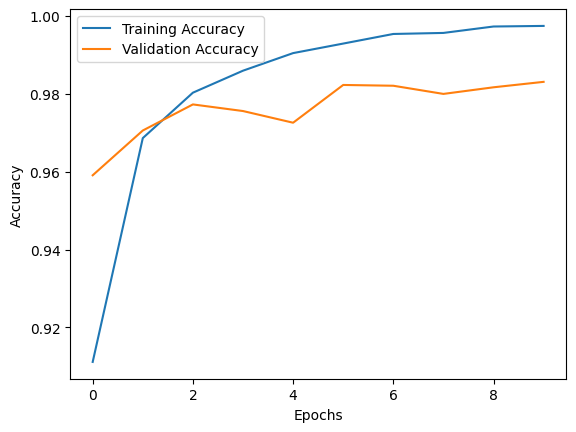

In [9]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data without scaling
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData).astype('float32')
test_data = test_images.reshape(test_images.shape[0], dimData).astype('float32')

# Convert pixel values to range [0, 1] by dividing by 255 (maximum pixel value)
train_data /= 255.0
test_data /= 255.0

# Convert labels to one-hot encoding
train_labels_one_hot = pd.get_dummies(train_labels).values
test_labels_one_hot = pd.get_dummies(test_labels).values

# Create the model with the same architecture
model = Sequential([
    Dense(512, activation='relu', input_shape=(dimData,)),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                    validation_data=(test_data, test_labels_one_hot))

# Plot the loss and accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# By removing the scaling step from the preprocessing, the pixel values of the images are not normalized to the range [0,1]. Instead, they keep their original values, which range from 0 to 255 in grayscale photos. Without scaling, the neural network may suffer training issues because the input values are relatively large in comparison to the network's weights. This can result in slower convergence and possibly inferior performance. Scaling the input data is frequently advantageous for neural networks in practice since it helps to stabilize and accelerate the training process. By scaling the input data to a similar range, the optimizer may more efficiently update the network weights to reduce the loss function.As a result, eliminating the scaling step may cause delayed training convergence and maybe lower accuracy than scaling the data. However, the influence on performance may differ based on the dataset and model architecture.
